In [71]:
import numpy as np
import pandas as pd
from sklearn.cross_validation import cross_val_score
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [72]:
# first replace all empty cells with NAN and then drop rows containing NAN cells
df = pd.read_csv('C:/Users/ashkan/Desktop/CS4660/Final project/train/train_users_2.csv')
df_test = pd.read_csv('C:/Users/ashkan/Desktop/CS4660/Final project/test/test_users.csv')

#df=df.replace('', np.nan)
#df=df.dropna()

print(df.shape)
df.head()
#df_test.head()
#df_test.head()

(213451, 16)


,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [73]:
df.columns

Index(['id', 'date_account_created', 'timestamp_first_active',
       'date_first_booking', 'gender', 'age', 'signup_method', 'signup_flow',
       'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser', 'country_destination'],
      dtype='object')

In [74]:
# Missing Data, Check for empty value in our dataset:
df.isnull().sum()

id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         124543
gender                          0
age                         87990
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6065
signup_app                      0
first_device_type               0
first_browser                   0
country_destination             0
dtype: int64

In [75]:
for value in ['gender', 'signup_method','language', 'affiliate_channel','affiliate_provider','first_affiliate_tracked', 
              'signup_app','first_device_type', 'first_browser']:
    print(value,":", sum(df[value] == '-unknown-'))

gender : 95688
signup_method : 0
language : 0
affiliate_channel : 0
affiliate_provider : 0
first_affiliate_tracked : 0
signup_app : 0
first_device_type : 0
first_browser : 27266


In [76]:
#Missing Data
# gender column has -unknown- value. change it to nan

df.gender.replace('-unknown-', np.nan, inplace=True)
df.first_browser.replace('-unknown-', np.NaN, inplace=True)
df.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,NaN,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,NaN,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [77]:
# evaluating nan percentage for each feature.

df_nan = (df.isnull().sum() / df.shape[0]) * 100
df_nan[df_nan > 0]

date_first_booking         58.347349
gender                     44.829024
age                        41.222576
first_affiliate_tracked     2.841402
first_browser              12.773892
dtype: float64

In [101]:
#Data Types
# transform into categorical 

categorical_features = [
    'affiliate_channel',
    'affiliate_provider',
    'country_destination',
    'first_affiliate_tracked',
    'first_browser',
    'first_device_type',
    'gender',
    'language',
    'signup_app',
    'signup_method'
]

for categorical_feature in categorical_features:
    df[categorical_feature] = df[categorical_feature].astype('category')
df.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,date_first_active
0,gxn3p5htnn,2010-06-28,2009-03-19 04:32:55,NaT,NaN,-1.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF,2009-03-19
1,820tgsjxq7,2011-05-25,2009-05-23 17:48:09,NaT,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF,2009-05-23
2,4ft3gnwmtx,2010-09-28,2009-06-09 23:12:47,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US,2009-06-09
3,bjjt8pjhuk,2011-12-05,2009-10-31 06:01:29,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other,2009-10-31
4,87mebub9p4,2010-09-14,2009-12-08 06:11:05,2010-02-18,NaN,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US,2009-12-08


In [78]:
df['date_account_created'] = pd.to_datetime(df['date_account_created'])
df['date_first_booking'] = pd.to_datetime(df['date_first_booking'])
df['date_first_active'] = pd.to_datetime((df.timestamp_first_active // 1000000), format='%Y%m%d')
df['timestamp_first_active'] = pd.to_datetime(df['timestamp_first_active'], format='%Y%m%d%H%M%S')

df.head()

#user_df_rev['date_account_created'] = pd.to_datetime(user_df['date_account_created'], format='%Y-%m-%d')
#user_df_rev['timestamp_first_active'] = pd.to_datetime(user_df['timestamp_first_active'], format='%Y%m%d%H%M%S')
#user_df_rev['date_account_created'].fillna(user_df.timestamp_first_active, inplace=True)
#user_df_rev.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,date_first_active
0,gxn3p5htnn,2010-06-28,2009-03-19 04:32:55,NaT,NaN,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF,2009-03-19
1,820tgsjxq7,2011-05-25,2009-05-23 17:48:09,NaT,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF,2009-05-23
2,4ft3gnwmtx,2010-09-28,2009-06-09 23:12:47,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US,2009-06-09
3,bjjt8pjhuk,2011-12-05,2009-10-31 06:01:29,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other,2009-10-31
4,87mebub9p4,2010-09-14,2009-12-08 06:11:05,2010-02-18,NaN,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US,2009-12-08


In [79]:
df.loc[df.age > 90, 'age'] = np.NaN
df.loc[df.age < 15, 'age'] = np.NaN
df['age'].fillna(-1, inplace=True)
df.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,date_first_active
0,gxn3p5htnn,2010-06-28,2009-03-19 04:32:55,NaT,NaN,-1.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF,2009-03-19
1,820tgsjxq7,2011-05-25,2009-05-23 17:48:09,NaT,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF,2009-05-23
2,4ft3gnwmtx,2010-09-28,2009-06-09 23:12:47,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US,2009-06-09
3,bjjt8pjhuk,2011-12-05,2009-10-31 06:01:29,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other,2009-10-31
4,87mebub9p4,2010-09-14,2009-12-08 06:11:05,2010-02-18,NaN,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US,2009-12-08


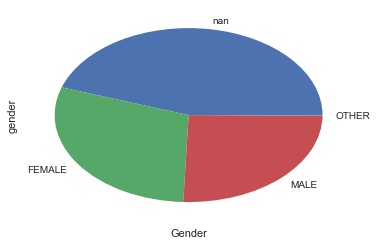

In [80]:
df.gender.value_counts(dropna=False).plot(kind='pie')
plt.xlabel('Gender')
plt.show()

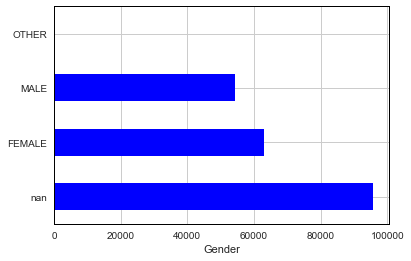

In [81]:
df.gender.value_counts(dropna=False).plot(kind='barh', color='blue', rot=0)
plt.xlabel('Gender')
plt.show()

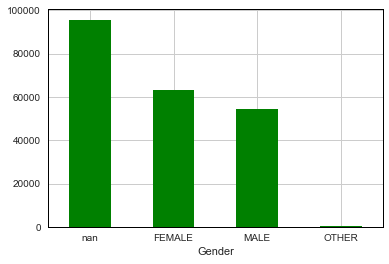

In [82]:
df.gender.value_counts(dropna=False).plot(kind='bar', color='green', rot=0)
plt.xlabel('Gender')
plt.show()

In [83]:
# The ammount of missing data is alot. Also,there is a slight difference between user gender.(above)

In [102]:

lowercase = lambda x: x.lower()
df['gender'] = df['gender'].apply(lowercase)

In [86]:
#frecuency of the countries:

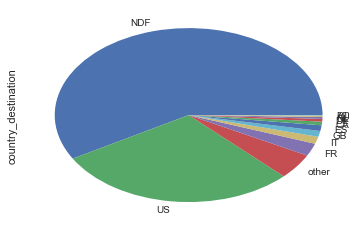

In [87]:
country = df.country_destination.value_counts() / df.shape[0] * 100
country.plot(kind='pie')
sns.despine()
plt.show()

In [88]:
# the reservation is likely to be inside the US.

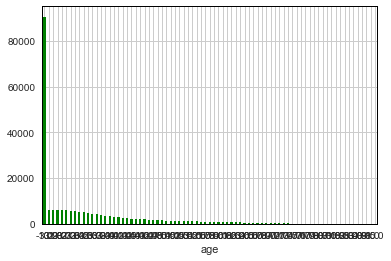

In [89]:
#age
import matplotlib.pyplot as plt
import seaborn as sns
df.age.value_counts(dropna=True).plot(kind='bar', color='green', rot=0)
plt.xlabel('age')
plt.show()

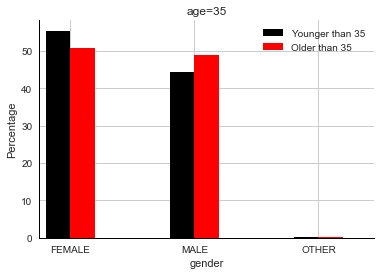

In [90]:
age = 35

younger_35 = sum(df.loc[df['age'] < age, 'gender'].value_counts())
older_35 = sum(df.loc[df['age'] > age, 'gender'].value_counts())
younger_final = df.loc[df['age'] < age, 'gender'].value_counts() / younger_35 * 100
older_final = df.loc[df['age'] > age, 'gender'].value_counts() / older_35 * 100
younger_final.plot(kind='bar', width=.2, color='black', position=1, label='Younger than 35', rot=0)
older_final.plot(kind='bar', width=.2, color='red', position=0, label='Older than 35', rot=0)
plt.legend()
plt.xlabel('gender')
plt.ylabel('Percentage')
plt.title('age=35')


sns.despine()
plt.show()

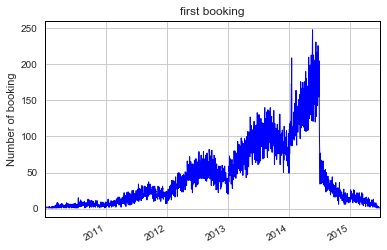

In [91]:
sns.set_style("whitegrid", {'axes.edgecolor': '0'})
df.date_first_booking.value_counts().plot(kind='line', linewidth=1, color='blue')
plt.ylabel('Number of booking')
plt.title('first booking')
plt.show()


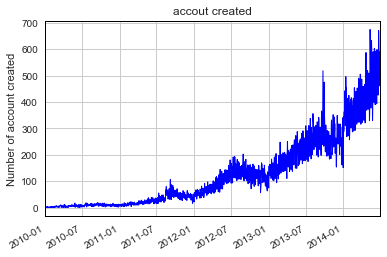

In [92]:
sns.set_style("whitegrid", {'axes.edgecolor': '0'})
#sns.set_context("poster", font_scale=1)
df.date_account_created.value_counts().plot(kind='line', linewidth=1, color='blue')
plt.ylabel('Number of account created')
plt.title('accout created')


plt.show()


In [93]:
# See how fast Airbnb has grown from 2010 to 2014(above pic)

In [94]:
# Does this correlate with the date when the user was active for the first time?
#It should be very similar (below pic)

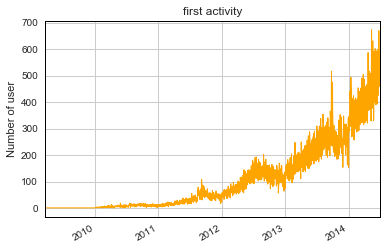

In [95]:
df.date_first_active.value_counts().plot(kind='line', linewidth=1, color='orange')
plt.ylabel('Number of user')
plt.title('first activity')

plt.show()

In [96]:
# We can se that's almost the same as date_account_created, 
# Notice small peaks. let's dig into those peaks.

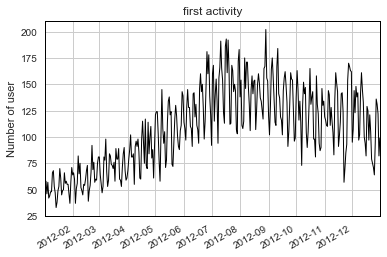

In [97]:
df2012 = df[df['date_first_active'] > pd.to_datetime(20120101, format='%Y%m%d')]
df2012 = df2012[df2012['date_first_active'] < pd.to_datetime(20130101, format='%Y%m%d')]
df2012.date_first_active.value_counts().plot(kind='line', linewidth=1, color='black')
plt.ylabel('Number of user')
plt.title('first activity')
plt.show()


In [98]:
# The minimums is Sunday and maximum at Tuesdays

In [147]:
#One Hot Encoding

In [83]:
df.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,date_first_active
0,gxn3p5htnn,2010-06-28,2009-03-19 04:32:55,NaT,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF,2009-03-19
1,820tgsjxq7,2011-05-25,2009-05-23 17:48:09,NaT,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF,2009-05-23
2,4ft3gnwmtx,2010-09-28,2009-06-09 23:12:47,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US,2009-06-09
3,bjjt8pjhuk,2011-12-05,2009-10-31 06:01:29,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other,2009-10-31
4,87mebub9p4,2010-09-14,2009-12-08 06:11:05,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US,2009-12-08


In [112]:
df.columns
df=df.dropna()


In [113]:
X1= pd.get_dummies(df, columns=['gender', 'signup_method','signup_flow','language', 'affiliate_channel', 
                                       'affiliate_provider','first_affiliate_tracked', 'signup_app', 'first_device_type', 
                                       'first_browser' ])
                           

del X1['date_account_created' ]
del X1['timestamp_first_active' ]
del X1['date_first_booking']
del X1['date_first_active']
del X1['country_destination']
print (X1.head())

y1 = df['country_destination']
y1.head()

    age  gender_-unknown-  gender_FEMALE  gender_MALE  gender_OTHER  \
2  56.0                 0              1            0             0   
3  42.0                 0              1            0             0   
4  41.0                 1              0            0             0   
6  46.0                 0              1            0             0   
7  47.0                 0              1            0             0   

   signup_method_basic  signup_method_facebook  signup_method_google  \
2                    1                       0                     0   
3                    0                       1                     0   
4                    1                       0                     0   
6                    1                       0                     0   
7                    1                       0                     0   

   signup_flow_0  signup_flow_1            ...             \
2              0              0            ...              
3              1  

2       US
3    other
4       US
6       US
7       US
Name: country_destination, dtype: category
Categories (12, object): [AU, CA, DE, ES, ..., NL, PT, US, other]

In [117]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=3)

# print the size of the traning set:
print(X1_train.shape)
print(y1_train.shape)

(47719, 147)
(47719,)


In [120]:
from sklearn.tree import DecisionTreeClassifier
my_decisiontree1 = DecisionTreeClassifier()
my_decisiontree1.fit(X1_train, y1_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [121]:
y1_predict_dt = my_decisiontree1.predict(X1_test)


In [122]:
# Accuracy Evaluation
from sklearn.metrics import accuracy_score

score_dt1 = accuracy_score(y1_test, y1_predict_dt)

print("Accuracy for Decision Tree:", score_dt1)


Accuracy for Decision Tree: 0.594660668883
